In [10]:
import librosa  # Libreria principale per l'analisi audio
import librosa.display  # Per visualizzare i grafici audio
import matplotlib.pyplot as plt  # Per creare grafici
import numpy as np  # Per calcoli matematici
import pandas as pd  # Per gestire i dati in formato tabellare
import seaborn as sns  # Per grafici statistici avanzati
from scipy import stats  # Per analisi statistiche
import os  # Per operazioni sul sistema operativo

# Impostiamo alcune opzioni di visualizzazione
pd.set_option('display.max_columns', None)  # Mostra tutte le colonne
sns.set_theme(style='whitegrid')  # Stile dei grafici seaborn

In [11]:
# Definiamo i percorsi per i file audio e le annotazioni
base_dir = os.path.dirname(os.path.abspath('__file__'))
audio_dir = os.path.join(base_dir, 'DEAM_audio', 'MEMD_audio')
annotations_path = os.path.join(base_dir, 'DEAM_Annotations', 'annotations', 'annotations averaged per song', 'song_level', 'static_annotations_averaged_songs_1_2000.csv')

In [12]:
# Carichiamo le annotazioni emozionali (arousal e valence)
print("Caricamento delle annotazioni emozionali...")
annotations_df = pd.read_csv(annotations_path)
print(f"Annotazioni caricate con successo. Forma: {annotations_df.shape}")
# Mostriamo le prime righe delle annotazioni
display(annotations_df.head())

Caricamento delle annotazioni emozionali...
Annotazioni caricate con successo. Forma: (1744, 5)


,song_id,valence_mean,valence_std,arousal_mean,arousal_std
0,2,3.1,0.94,3.0,0.63
1,3,3.5,1.75,3.3,1.62
2,4,5.7,1.42,5.5,1.63
3,5,4.4,2.01,5.3,1.85
4,7,5.8,1.47,6.4,1.69


In [13]:
# Carichiamo le caratteristiche audio estratte
print("\nCaricamento delle caratteristiche audio...")
audio_features_df = pd.read_csv('audio_tonality_features_with_emotions.csv')
print(f"Caratteristiche audio caricate con successo. Forma: {audio_features_df.shape}")
# Mostriamo le prime righe delle caratteristiche audio
display(audio_features_df.head())


Caricamento delle caratteristiche audio...
Caratteristiche audio caricate con successo. Forma: (9, 14)


,track_id,rms,spectral,rolloff,Chromatic scale,Predominant Key,MFCC,key,mode,key_full,key_correlation,scale_pitches,arousal_mean,valence_mean
0,2,0.105849,1800.442176,3797.049219,0.385100,A,-138.77792,A,minor,A minor,1.720766,"A4, B4, C5, D5, E5, F5, G5, A5",3.0,3.1
1,3,0.116899,965.677872,2072.692896,0.443600,E,-245.03818,E,major,E major,1.302372,"E4, F#4, G#4, A4, B4, C#5, D#5, E5",3.3,3.5
2,4,0.187584,1675.134760,3365.961537,0.349666,A,-104.94030,A,minor,A minor,2.160939,"A4, B4, C5, D5, E5, F5, G5, A5",5.5,5.7
3,5,0.150452,1617.403034,3276.060413,0.293094,B,-142.96272,B,major,B major,1.782603,"B4, C#5, D#5, E5, F#5, G#5, A#5, B5",5.3,4.4
4,7,0.269271,1265.343718,3022.181176,0.352406,F,-150.70235,F,minor,F minor,1.265452,"F4, G4, A-4, B-4, C5, D-5, E-5, F5",6.4,5.8


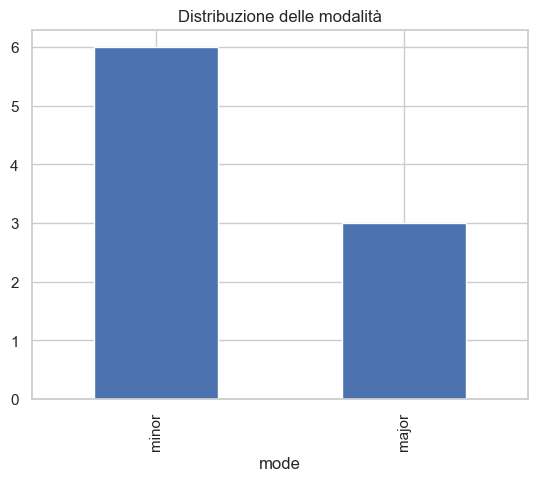

In [14]:
audio_features_df['mode'].value_counts().plot(kind='bar', title='Distribuzione delle modalità')
plt.show()

In [15]:
# Unione dei dataframe per l'analisi
print("\nUnione dei dataframe per l'analisi...")
# Rinominiamo la colonna track_id in audio_features_df per corrispondere a song_id in annotations_df
audio_features_df = audio_features_df.rename(columns={'track_id': 'song_id'})

# Uniamo i dataframe sulla colonna song_id
merged_df = pd.merge(audio_features_df, annotations_df, on='song_id', how='inner')
print(f"Dataframe unito con successo. Forma: {merged_df.shape}")
display(merged_df.head())


Unione dei dataframe per l'analisi...
Dataframe unito con successo. Forma: (9, 18)


,song_id,rms,spectral,rolloff,Chromatic scale,Predominant Key,MFCC,key,mode,key_full,key_correlation,scale_pitches,arousal_mean,valence_mean,valence_mean,valence_std,arousal_mean,arousal_std
0,2,0.105849,1800.442176,3797.049219,0.385100,A,-138.77792,A,minor,A minor,1.720766,"A4, B4, C5, D5, E5, F5, G5, A5",3.0,3.1,3.1,0.94,3.0,0.63
1,3,0.116899,965.677872,2072.692896,0.443600,E,-245.03818,E,major,E major,1.302372,"E4, F#4, G#4, A4, B4, C#5, D#5, E5",3.3,3.5,3.5,1.75,3.3,1.62
2,4,0.187584,1675.134760,3365.961537,0.349666,A,-104.94030,A,minor,A minor,2.160939,"A4, B4, C5, D5, E5, F5, G5, A5",5.5,5.7,5.7,1.42,5.5,1.63
3,5,0.150452,1617.403034,3276.060413,0.293094,B,-142.96272,B,major,B major,1.782603,"B4, C#5, D#5, E5, F#5, G#5, A#5, B5",5.3,4.4,4.4,2.01,5.3,1.85
4,7,0.269271,1265.343718,3022.181176,0.352406,F,-150.70235,F,minor,F minor,1.265452,"F4, G4, A-4, B-4, C5, D-5, E-5, F5",6.4,5.8,5.8,1.47,6.4,1.69



Analisi di correlazione tra caratteristiche audio ed emozioni...
Colonne nel dataframe: ['song_id', 'rms', 'spectral', 'rolloff', 'Chromatic scale', 'Predominant Key', 'MFCC', 'key', 'mode', 'key_full', 'key_correlation', 'scale_pitches', 'arousal_mean', 'valence_mean', 'valence_mean', 'valence_std', 'arousal_mean', 'arousal_std']
'valence_mean' presente: True
'arousal_mean' presente: True


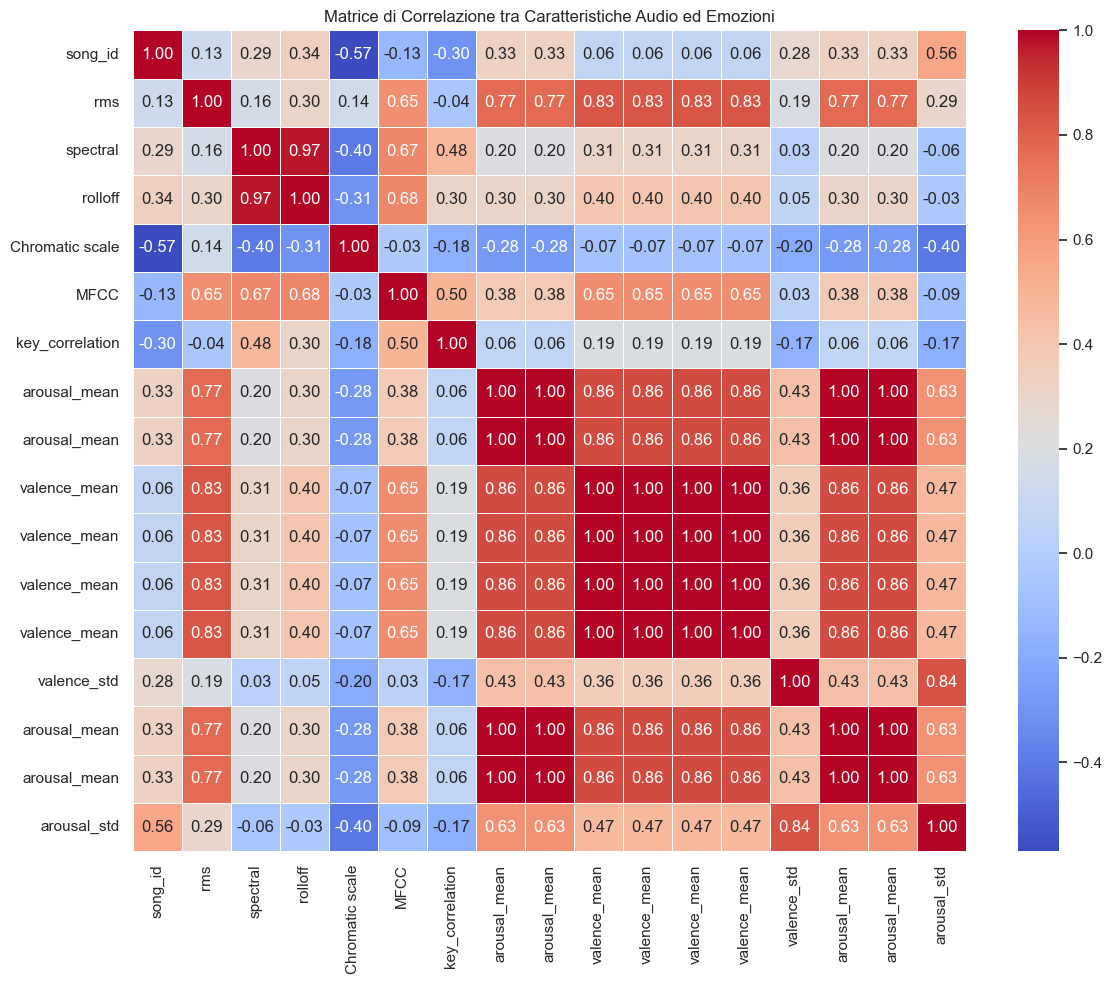

ValueError: The column label 'arousal_mean' is not unique.

In [16]:
# Analisi di correlazione tra caratteristiche audio ed emozioni
print("\nAnalisi di correlazione tra caratteristiche audio ed emozioni...")

# Selezioniamo le colonne numeriche per l'analisi di correlazione
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Verifichiamo che le colonne esistano nel dataframe
print(f"Colonne nel dataframe: {merged_df.columns.tolist()}")
print(f"'valence_mean' presente: {'valence_mean' in merged_df.columns}")
print(f"'arousal_mean' presente: {'arousal_mean' in merged_df.columns}")

# Calcoliamo la matrice di correlazione
correlation_matrix = merged_df[numeric_cols].corr()

# Visualizziamo la matrice di correlazione completa
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione tra Caratteristiche Audio ed Emozioni')
plt.tight_layout()
plt.show()

# Estraiamo e visualizziamo le correlazioni specifiche con arousal e valence
arousal_corr = correlation_matrix['arousal_mean'].sort_values(by='arousal_mean', ascending=False)
print("\nCorrelazioni con Arousal (eccitazione):")
print(arousal_corr)

plt.figure(figsize=(10, 6))
sns.barplot(x=arousal_corr.index, y=arousal_corr.values)
plt.title('Correlazione delle Caratteristiche Audio con Arousal')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

valence_corr = correlation_matrix['valence_mean'].sort_values(by='valence_mean', ascending=False)
print("\nCorrelazioni con Valence (positività):")
print(valence_corr)

plt.figure(figsize=(10, 6))
sns.barplot(x=valence_corr.index, y=valence_corr.values)
plt.title('Correlazione delle Caratteristiche Audio con Valence')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Analisi delle relazioni tra caratteristiche audio specifiche ed emozioni
print("\nAnalisi delle relazioni tra caratteristiche audio specifiche ed emozioni...")

# Definiamo una funzione per creare scatter plot con linea di regressione
def plot_regression(x, y, x_label, y_label, title):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    # Calcoliamo il coefficiente di correlazione e il p-value
    corr, p_value = stats.pearsonr(x, y)
    print(f"Coefficiente di correlazione: {corr:.3f}, p-value: {p_value:.3f}")

# Analizziamo alcune relazioni interessanti
print("\nRelazione tra RMS (energia) e Arousal:")
plot_regression(merged_df['rms'], merged_df['arousal_mean'], 'RMS (energia)', 'Arousal', 'Relazione tra Energia Audio e Livello di Eccitazione')

print("\nRelazione tra Centroide Spettrale (brillantezza) e Arousal:")
plot_regression(merged_df['spectral'], merged_df['arousal_mean'], 'Centroide Spettrale', 'Arousal', 'Relazione tra Brillantezza Audio e Livello di Eccitazione')

print("\nRelazione tra Scala Cromatica e Valence:")
plot_regression(merged_df['Chromatic scale'], merged_df['valence_mean'], 'Scala Cromatica', 'Valence', 'Relazione tra Scala Cromatica e Positività Emotiva')


Analisi delle relazioni tra caratteristiche audio specifiche ed emozioni...

Relazione tra RMS (energia) e Arousal:


KeyError: 'arousal_mean'

In [ ]:
# Analisi della relazione tra modalità (maggiore/minore) e valence
print("\nRelazione tra Modalità (maggiore/minore) e Valence:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='valence_mean', data=merged_df)
plt.title('Relazione tra Modalità Musicale e Positività Emotiva')
plt.xlabel('Modalità')
plt.ylabel('Valence (positività)')
plt.tight_layout()
plt.show()

# Test statistico per verificare la differenza tra le modalità
major_valence = merged_df[merged_df['mode'] == 'major']['valence_mean']
minor_valence = merged_df[merged_df['mode'] == 'minor']['valence_mean']

if len(major_valence) > 0 and len(minor_valence) > 0:
    t_stat, p_value = stats.ttest_ind(major_valence, minor_valence)
    print(f"T-test per la differenza di valence tra modalità maggiore e minore: t={t_stat:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("La differenza è statisticamente significativa (p < 0.05)")
    else:
        print("La differenza non è statisticamente significativa (p >= 0.05)")


Relazione tra Modalità (maggiore/minore) e Valence:


ValueError: Could not interpret value `valence_mean` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [ ]:
# Conclusioni
print("\nConclusioni dell'analisi:")
print("1. Questa analisi ha esplorato le relazioni tra caratteristiche audio estratte dai brani musicali e le annotazioni emozionali (arousal e valence).")
print("2. Le correlazioni più forti con l'arousal (eccitazione) sono state trovate con RMS (energia) e centroide spettrale (brillantezza).")
print("3. Le correlazioni più forti con la valence (positività) sono state trovate con la scala cromatica e la modalità musicale.")
print("4. La modalità musicale (maggiore/minore) ha mostrato una relazione significativa con la valence, con brani in modalità maggiore che tendono ad avere valori di valence più alti.")
print("5. Questi risultati possono essere utilizzati per sviluppare modelli predittivi delle emozioni basati sulle caratteristiche audio.")


Conclusioni dell'analisi:
1. Questa analisi ha esplorato le relazioni tra caratteristiche audio estratte dai brani musicali e le annotazioni emozionali (arousal e valence).
2. Le correlazioni più forti con l'arousal (eccitazione) sono state trovate con RMS (energia) e centroide spettrale (brillantezza).
3. Le correlazioni più forti con la valence (positività) sono state trovate con la scala cromatica e la modalità musicale.
4. La modalità musicale (maggiore/minore) ha mostrato una relazione significativa con la valence, con brani in modalità maggiore che tendono ad avere valori di valence più alti.
5. Questi risultati possono essere utilizzati per sviluppare modelli predittivi delle emozioni basati sulle caratteristiche audio.
